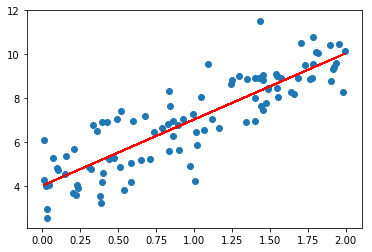

theta = [4.02145786 3.00706277]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = 2 * np.random.random(size = 100)
y = x * 3.0 + 4.0 + np.random.normal(size = 100)
X = x.reshape(-1, 1)

#损失函数
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')

#损失函数的梯度
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res *2 /len(X_b)

#梯度下降法
def gradient_descent(X_b, y, initial_thata, eta, n_iters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:# n_iters是最大循环次数
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
    
    return theta

X_b = np.hstack([np.ones((len(x), 1)), x.reshape(-1, 1)])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)


plt.scatter(x, y)
Y = X_b.dot(theta)
plt.plot(x, Y, color="red")
plt.show()
print("theta = " + str(theta))

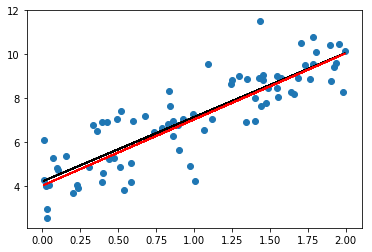

运用梯度下降法 R^2=0.7121007421354142
未用梯度下降法 R^2=0.7724307181171322


In [8]:
# 划分训练集和测试集
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
# 简单线性规划
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
# 分子
num = 0.0
# 分母
d = 0.0
for x_i, y_i in zip(x_train, y_train):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) ** 2
a = num/d
b = y_mean - a*x_mean
y_hat = a*x_train + b # 回归函数
plt.scatter(x_train, y_train)
plt.plot(x_train, y_hat, color="black")#简单
Y = X_b.dot(theta)
plt.plot(x, Y, color="red")#梯度
plt.show()

score1 = 0.7121007421354142
y_predict = a*x_test + b
score2 = r2_score(y_test, y_predict)
print("运用梯度下降法 R^2=" + str(score1))
print("未用梯度下降法 R^2=" + str(score2))